<a href="https://colab.research.google.com/github/luqmanbuang/Capstone/blob/master/Main_Phase_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

#Importing test dataset
df_test_FD001 = pd.read_csv('/content/gdrive/My Drive/Capstone/test_FD001.txt', sep=' ', header=None)
df_train_FD001 = pd.read_csv('/content/gdrive/My Drive/Capstone/train_FD001.txt', sep=' ', header=None)


# dropping NAN values
df_test_FD001 = df_test_FD001.dropna(axis=1, how='all')
df_train_FD001 = df_train_FD001.dropna(axis=1, how='all')

# Naming the columns
df_test_FD001.columns = ["unit", "cycles", "Op1",
                      "Op2", "Op3", "S1", "S2",
                      "S3", "S4", "S5", "S6", "S7", "S8", "S9", "S10", "S11",
                      "S12", "S13", "S14", "S15", "S16", "S17", "S18", "S19", "S20", "S21"]

df_train_FD001.columns = ["unit", "cycles", "Op1",
                      "Op2", "Op3", "S1", "S2",
                      "S3", "S4", "S5", "S6", "S7", "S8", "S9", "S10", "S11",
                      "S12", "S13", "S14", "S15", "S16", "S17", "S18", "S19", "S20", "S21"]

# data preprocessing; removing unnecessary data
df_test_FD001.drop(['Op3','S1', 'S5', 'S6', 'S16', 'S10', 'S18', 'S19'], axis=1, inplace=True)
df_train_FD001.drop(['Op3','S1', 'S5', 'S6', 'S16', 'S10', 'S18', 'S19'], axis=1, inplace=True)

df_test_FD001['unit'] += 100


In [ ]:
df_combined = pd.concat([df_train_FD001, df_test_FD001]) #combine the two datasets

from sklearn.preprocessing import MinMaxScaler
# MinMaxScaler
scaler = MinMaxScaler()
df_combined.iloc[:,2:18] = scaler.fit_transform(df_combined.iloc[:,2:18])

In [ ]:
#split them again
df_train_FD001 = df_combined[(df_combined.unit <= 100)]
df_test_FD001 = df_combined[(df_combined.unit >= 101)]

df_test_FD001['unit'] -= 100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
# finding the max cycles of a unit which is used to find the Time to Failure (TTF)

df_train_FD001 = pd.merge(df_train_FD001, df_train_FD001.groupby('unit', as_index=False)['cycles'].max(), how='left', on='unit')
df_train_FD001.rename(columns={"cycles_x": "cycles", "cycles_y": "maxcycles"}, inplace=True)

df_train_FD001['TTF'] = df_train_FD001['maxcycles'] - df_train_FD001['cycles']

# defining Fraction of Time to Failure (fTTF), where value of 1 denotes healthy engine and 0 denotes failure
def fractionTTF(dat,q):
    return(dat.TTF[q]-dat.TTF.min()) / (dat.TTF.max()-dat.TTF.min())

fTTFz = []
fTTF = []

for i in range(df_train_FD001['unit'].min(),df_train_FD001['unit'].max()+1):
    dat=df_train_FD001[df_train_FD001.unit==i]
    dat = dat.reset_index(drop=True)
    for q in range(len(dat)):
        fTTFz = fractionTTF(dat, q)
        fTTF.append(fTTFz)

df_train_FD001['fTTF'] = fTTF


In [ ]:
# train set
X_test = df_test_FD001[['cycles', 'Op1', 'Op2', 'S2', 'S3', 'S4', 'S7', 'S8', 'S9', 'S11', 'S12',
          'S13', 'S14', 'S15', 'S17', 'S20', 'S21']].values

# test set
X_train = df_train_FD001[['cycles', 'Op1', 'Op2', 'S2', 'S3', 'S4', 'S7', 'S8', 'S9', 'S11', 'S12',
          'S13', 'S14', 'S15', 'S17', 'S20', 'S21']].values
y_train = df_train_FD001[['fTTF']].values.ravel()

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.wrappers.scikit_learn import KerasRegressor

model = Sequential()
model.add(Dense(50, input_dim=17, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, y_train, epochs = 50)

Epoch 1/50
645/645 [==============================] - 1s 900us/step - loss: 0.0284
Epoch 2/50
645/645 [==============================] - 1s 954us/step - loss: 0.0063
Epoch 3/50
645/645 [==============================] - 1s 953us/step - loss: 0.0059
Epoch 4/50
645/645 [==============================] - 1s 912us/step - loss: 0.0057
Epoch 5/50
645/645 [==============================] - 1s 977us/step - loss: 0.0058
Epoch 6/50
645/645 [==============================] - 1s 999us/step - loss: 0.0062
Epoch 7/50
645/645 [==============================] - 1s 1ms/step - loss: 0.0052
Epoch 8/50
645/645 [==============================] - 1s 1ms/step - loss: 0.0050
Epoch 9/50
645/645 [==============================] - 1s 1ms/step - loss: 0.0052
Epoch 10/50
645/645 [==============================] - 1s 973us/step - loss: 0.0053
Epoch 11/50
645/645 [==============================] - 1s 981us/step - loss: 0.0048
Epoch 12/50
645/645 [==============================] - 1s 892us/step - loss: 0.0051
Epoch 1

In [ ]:
score = model.predict(X_test) 
df_test_FD001['predicted'] = score

# df_test_FD001

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
def totcycles(data):
    return(data['cycles'] / (1-data['predicted']))
    
df_test_FD001['maxpredcycles'] = totcycles(df_test_FD001)

# df_test_FD001

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


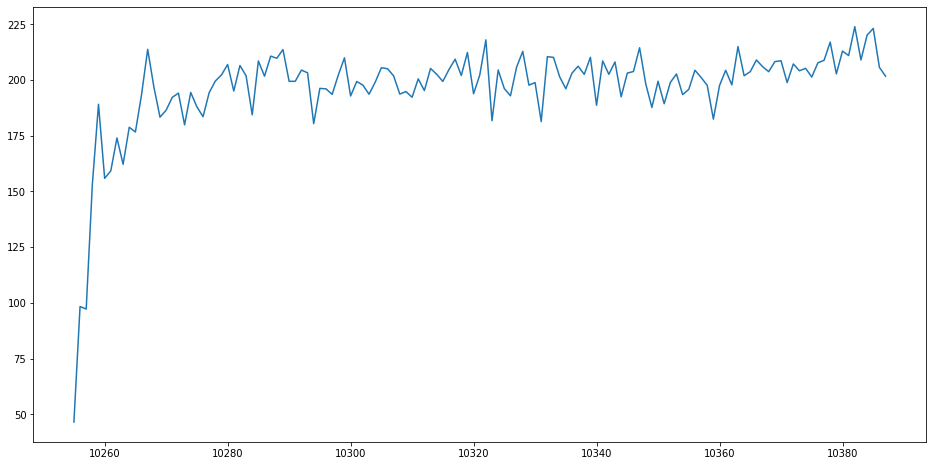

In [ ]:
plt.figure(figsize = (16, 8)) 
plt.plot(df_test_FD001.maxpredcycles[(df_test_FD001['cycles'] >0) & (df_test_FD001['unit']==80)])


In [ ]:
df_test_FD001.maxpredcycles[(df_test_FD001['cycles'] >10) & (df_test_FD001['unit']==80)].mean()

201.03468322753906

In [ ]:
for i in range(df_test_FD001['unit'].min(),df_test_FD001['unit'].max()+1):
   df_test_FD001.maxpredcycles[(df_test_FD001['unit'] == i)] = df_test_FD001.maxpredcycles[(df_test_FD001['cycles'] >10) & (df_test_FD001['unit']==i)].mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1020

In [87]:
df_test_FD001['Pred_RUL'] = df_test_FD001.maxpredcycles * (df_test_FD001['predicted'])

# df_test_FD001

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,unit,cycles,Op1,Op2,S2,S3,S4,S7,S8,S9,S11,S12,S13,S14,S15,S17,S20,S21,predicted,maxpredcycles,Pred_RUL
0,1,1,0.632184,0.692308,0.555882,0.339461,0.269413,0.652174,0.223881,0.127614,0.231214,0.597633,0.220588,0.132160,0.308965,0.333333,0.558140,0.641032,0.980626,204.729187,200.762833
1,1,2,0.344828,0.230769,0.170588,0.405473,0.222316,0.805153,0.179104,0.146684,0.404624,0.684418,0.264706,0.204768,0.213159,0.416667,0.682171,0.665240,0.987227,204.729187,202.114227
2,1,3,0.517241,0.538462,0.391176,0.373929,0.322248,0.685990,0.238806,0.158081,0.404624,0.646943,0.220588,0.155640,0.458638,0.416667,0.728682,0.698676,0.983370,204.729187,201.324478
3,1,4,0.741379,0.461538,0.385294,0.315020,0.408001,0.679549,0.208955,0.105717,0.277457,0.530572,0.250000,0.170090,0.257022,0.250000,0.666667,0.641300,0.969053,204.729187,198.393433
4,1,5,0.580460,0.461538,0.405882,0.379152,0.332039,0.694042,0.179104,0.102396,0.294798,0.682446,0.220588,0.152751,0.300885,0.166667,0.658915,0.693861,0.970263,204.729187,198.641174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.781609,0.461538,0.620588,0.635262,0.566172,0.573269,0.194030,0.541326,0.514451,0.394477,0.176471,0.584890,0.564063,0.500000,0.395349,0.405510,0.138230,230.112701,31.808464
13092,100,195,0.436782,0.384615,0.614706,0.556716,0.671843,0.542673,0.238806,0.533743,0.462428,0.465483,0.308824,0.572350,0.485956,0.583333,0.333333,0.512104,0.142448,230.112701,32.779091
13093,100,196,0.465517,0.230769,0.679412,0.503656,0.414754,0.513688,0.328358,0.561249,0.445087,0.491124,0.235294,0.605326,0.507888,0.583333,0.372093,0.415808,0.146389,230.112701,33.685963
13094,100,197,0.281609,0.538462,0.626471,0.542093,0.626435,0.566828,0.268657,0.570403,0.468208,0.520710,0.294118,0.622046,0.562524,0.583333,0.403101,0.502474,0.133048,230.112701,30.616123


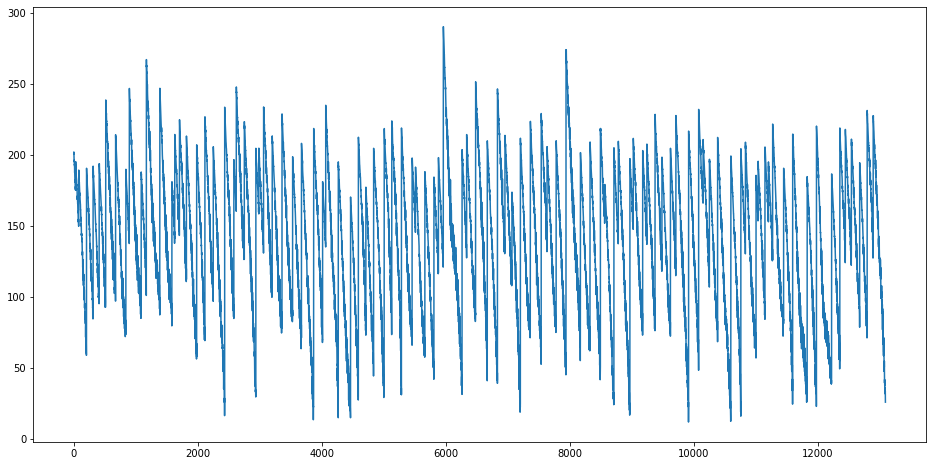

In [ ]:
plt.figure(figsize = (16, 8)) 
plt.plot(df_test_FD001.Pred_RUL)

In [ ]:
df_test_FD001.Pred_RUL[(df_test_FD001['unit']==94)].min()

49.384403228759766

In [89]:
maxpred = []
for i in range(1,101):
  maxpred.append(df_test_FD001.Pred_RUL[(df_test_FD001['unit']==i)].min()) 

len(maxpred)

100

In [85]:
Results = pd.read_csv('/content/gdrive/My Drive/Capstone/RUL_FD001.txt', sep=' ', header=None)
Results = Results.dropna(axis=1, how='all')
Results.columns = ["Actual RUL"]

In [91]:
Results = pd.read_csv('/content/gdrive/My Drive/Capstone/RUL_FD001.txt', sep=' ', header=None)
Results = Results.dropna(axis=1, how='all')
Results.columns = ["Actual RUL"]
Results = Results.assign(unit=[1 + i for i in range(len(Results))])[['unit'] + Results.columns.tolist()]
Results['Pred RUL'] = maxpred
Results['Difference'] = Results['Actual RUL'] - Results['Pred RUL']
Results.set_index('unit')

,Actual RUL,Pred RUL,Difference
unit,,,
1,112,175.102600,-63.102600
2,98,149.812622,-51.812622
3,69,58.925468,10.074532
4,82,84.532486,-2.532486
5,91,95.263489,-4.263489
...,...,...,...
96,137,122.365166,14.634834
97,82,78.732162,3.267838
98,59,71.185036,-12.185036
